## 문제 분류
- 중요도 : 3/5
- 난이도 : 3/5
- 목표 수행 시간 : 4시간


## 스토리
아래는 2023년 상반기 국내 개봉한 영화 목록 일부이다. 당신이라면 어떤 영화를 추천하고 싶은가? 영화 목록을 토대로 영화를 추천할 수 있는 코드를 작성해보자.

데이터의 다양한 특성을 살펴보고 어떤 기준으로 추천하는 것이 좋을 지 생각해볼 필요가 있을 것 같다.

## 수행목표
본인만의 기준으로 영화를 추천하는 코드를 개발한다.

## 수행단계
- 데이터는 제공되는 파일인 `prob-0101.csv`를 사용한다.
- 영화 개수, 배급사 수, 감독 수, 출연진 수, 장르 수를 파악한다.
- 감독, 출연진 등 중복 조건들에 대해 파악한다.
- 본인이 추천하고 싶은 기준을 설정한다.
- 본인의 기준에 의해 영화 몇개를 추천하는 것이 적당한지 실험해 본다.
- 다양한 접근 조회 방법을 실험한다. (감독, 출연진 중복, 장르별 등)
- 개인별로 정한 기준이 서로 어떻게 다른지 확인한다.

In [65]:
import pandas as pd

file_path = "prob-0101.csv"
movies = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(movies.head())

          개봉일          제목                  배급사   감독                     출연진  \
0  2023-01-04         스위치  롯데컬처웍스, (주)롯데엔터테인먼트  마대윤  권상우, 오정세, 이민정, 박소이, 김준   
1  2023-01-05        강남좀비            (주)와이드릴리즈  이수성                 지일주, 지연   
2  2023-01-12  별 볼일 없는 인생             (주)이놀미디어  서동현                     정가은   
3  2023-01-12    10일간의 애인               (주)그노스  이영용                     송민경   
4  2023-01-18          교섭           플렉스엠엔터테인먼트  임순례            황정민, 현빈, 강기영   

       장르  
0      기타  
1     드라마  
2  멜로/로맨스  
3  멜로/로맨스  
4     드라마  


In [96]:
# matplotlib 세팅

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# D2Coding 폰트 경로 설정
font_path = "../D2Coding.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 폰트 설정
plt.rc('font', family=fontprop.get_name())
plt.rcParams.update({'font.size': 4})  # Set the font size to 14
plt.figure(figsize=(19, 10))

<Figure size 1900x1000 with 0 Axes>

<Figure size 1900x1000 with 0 Axes>

개봉일 종류 총합: 32


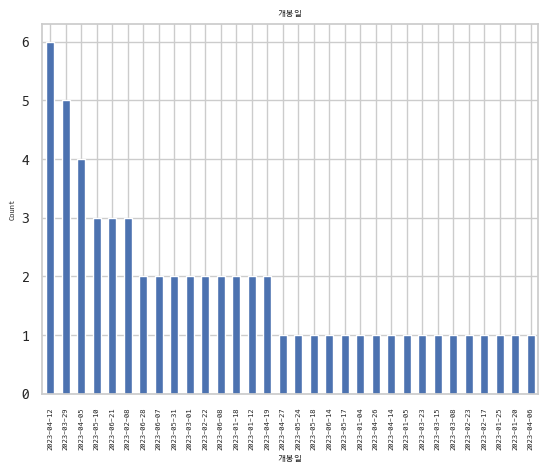

In [97]:
plt.title("개봉일", fontproperties=fontprop)
plt.xlabel("Opening date", fontproperties=fontprop)
plt.ylabel("Count", fontproperties=fontprop)
plt.xticks(rotation=45, fontproperties=fontprop)

date_counts = movies['개봉일'].value_counts()
# Calculate the total number of unique opening dates
print(f"개봉일 종류 총합: {len(date_counts)}")

# Plot the data
date_counts.plot(kind='bar')

plt.show()

배급사 종류 총합: 52


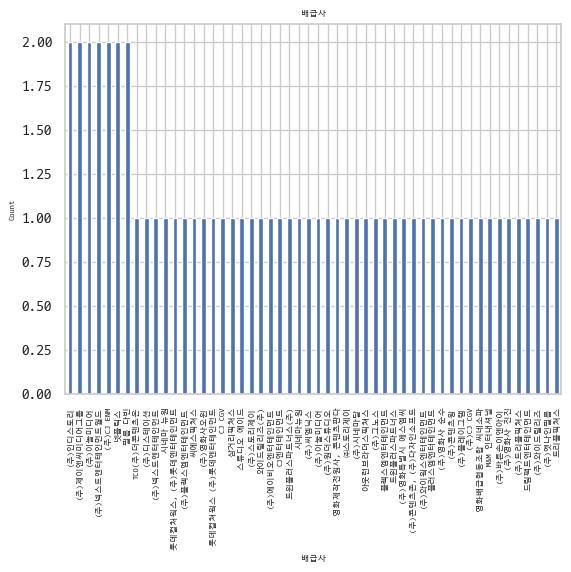

In [98]:
plt.title("배급사", fontproperties=fontprop)
plt.xlabel("Distributor", fontproperties=fontprop)
plt.ylabel("Count", fontproperties=fontprop)
plt.xticks(rotation=45, fontproperties=fontprop)

# Count the number of movies per distributor
distributor_counts = movies['배급사'].value_counts()
print(f"배급사 종류 총합: {distributor_counts.count()}")

# Plot the data
distributor_counts.plot(kind='bar')

plt.show()

감독 종류 총합: 62


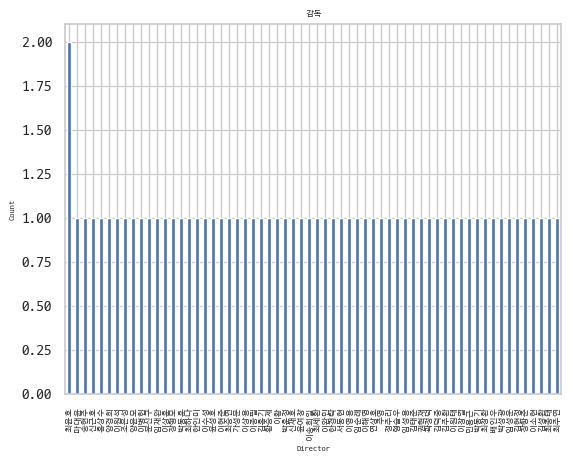

In [99]:
plt.title("감독", fontproperties=fontprop)
plt.xlabel("Director", fontproperties=fontprop)
plt.ylabel("Count", fontproperties=fontprop)
plt.xticks(rotation=45, fontproperties=fontprop)

directors = []
movies["감독"].apply(lambda x: directors.extend(x.split(", ")))
director_counts = pd.Series(directors).value_counts()
director_counts.plot(kind='bar')
print(f"감독 종류 총합: {len(set(directors))}")

plt.show()

출연진 종류 총합: 262


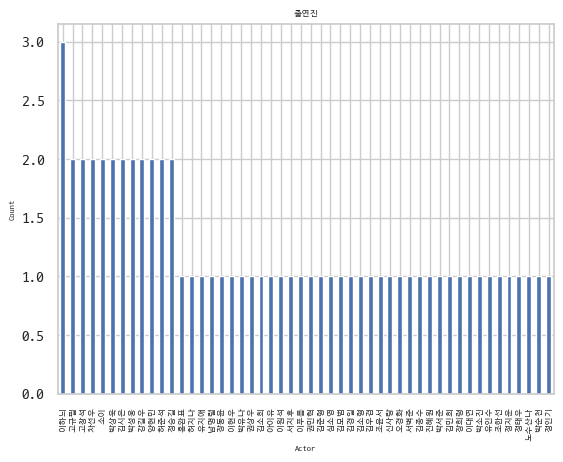

In [107]:
plt.title("출연진", fontproperties=fontprop)
plt.xlabel("Actor", fontproperties=fontprop)
plt.ylabel("Count", fontproperties=fontprop)
plt.xticks(rotation=45, fontproperties=fontprop)

actors = []
movies["출연진"].apply(lambda x: actors.extend(x.split(", ")))
actor_counts = pd.Series(actors).value_counts()
top_actors = actor_counts.head(50)
top_actors.plot(kind='bar')

print(f"출연진 종류 총합: {len(set(actors))}")

plt.show()

장르 종류 총합: 17


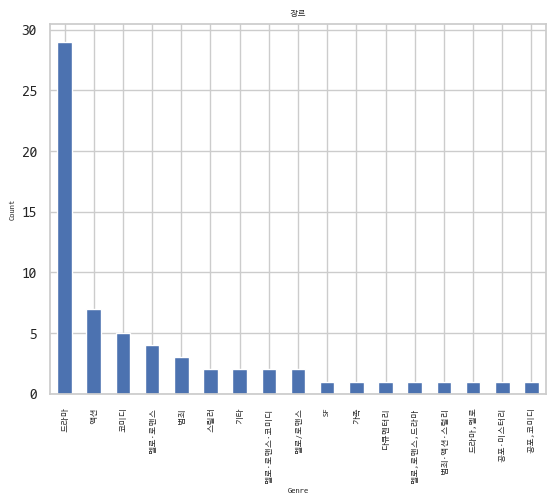

In [109]:
plt.title("장르", fontproperties=fontprop)
plt.xlabel("Genre", fontproperties=fontprop)
plt.ylabel("Count", fontproperties=fontprop)
plt.xticks(rotation=45, fontproperties=fontprop)

genres = []
movies["장르"].apply(lambda x: genres.extend(x.split(", ")))
genre_counts = pd.Series(genres).value_counts()

# Plot the data
genre_counts.plot(kind='bar')
print(f"장르 종류 총합: {len(set(genres))}")

plt.show()

In [110]:
hyunbin_movies = movies[movies["출연진"].apply(lambda x: "현빈" in x)]

print("현빈이 출연한 영화 목록:")
print(hyunbin_movies[["개봉일", "제목", "배급사", "감독", "출연진", "장르"]])

현빈이 출연한 영화 목록:
          개봉일  제목         배급사   감독           출연진   장르
4  2023-01-18  교섭  플렉스엠엔터테인먼트  임순례  황정민, 현빈, 강기영  드라마


In [111]:
lotte_movies = movies[movies["배급사"].str.contains("롯데컬처웍스")]

print("롯데컬처웍스에서 배급한 영화 목록:")
print(lotte_movies[["개봉일", "제목", "배급사", "감독", "출연진", "장르"]])

롯데컬처웍스에서 배급한 영화 목록:
          개봉일   제목                  배급사   감독                     출연진  장르
0  2023-01-04  스위치  롯데컬처웍스, (주)롯데엔터테인먼트  마대윤  권상우, 오정세, 이민정, 박소이, 김준  기타
